In [1]:
from math import sin, cos, pi
from fem.oned_stochastic import solve_system
from fem.polynomial_chaos import legendre_chaos, realise, calc_variance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

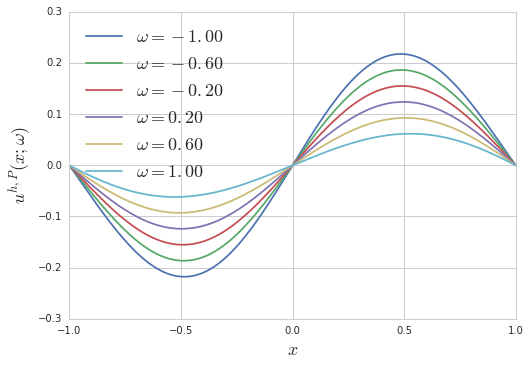

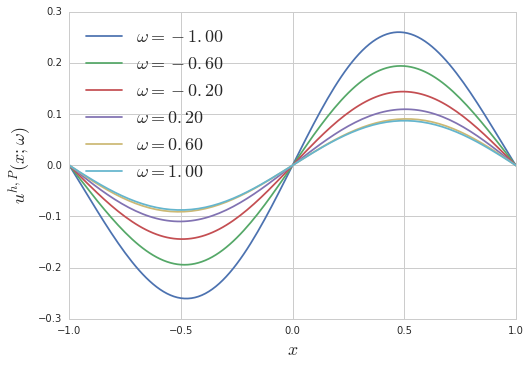

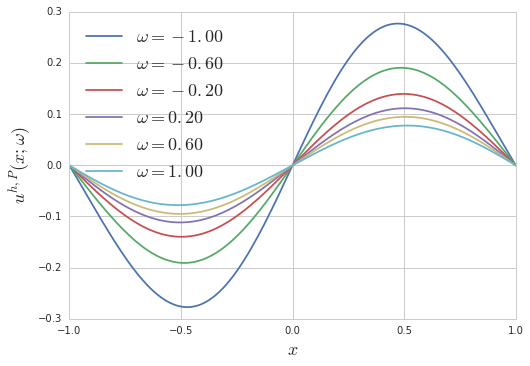

In [2]:
# -------------- REALISATION PLOTS ------------

# Define the right hand side
def f(x):
    return pi**2 * sin(pi*x)

# Set most of the parameters
N, d, eps, mu = 128, 1, 10e-1, 1

# Discretise the domain and set some values for
# omega we want realised
xs = np.linspace(-1, 1, N+1)
ws = np.linspace(-1, 1, 6)

for p in range(1,4):

    # Solve the system
    u = solve_system(N, d, p, eps, mu, f)

    # Create the plot
    fig, ax = plt.subplots(1)

    for w in ws:
        ax.plot(xs, realise(u, d, p, (w,)), label=r'$\omega = %.2f$' % w)

    ax.legend(loc=0, fontsize=18)
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$u^{h,P}(x;\omega)$', fontsize=18)

    fig.savefig('oned-stochastic-realisations-1-%i.pdf' % p)


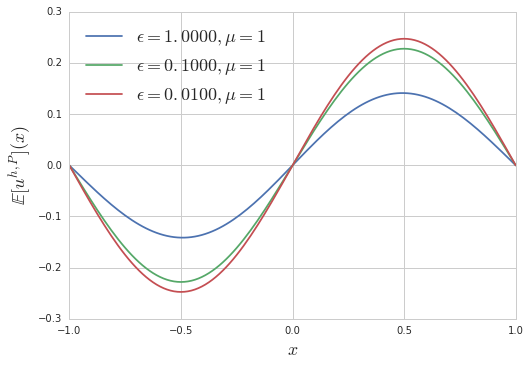

In [3]:
# -------------- EXPECTED VALUE PLOTS ---------------------\

fig, ax = plt.subplots(1)

for eps in [10e-1, 10e-2, 10e-3]:

    u = solve_system(N, 1, 3, eps, mu, f)
    ax.plot(xs, u[0,:], label=r'$\epsilon = %.4f, \mu = 1$' % eps)

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$\mathbb{E}[u^{h,P}](x)$', fontsize=18)
ax.legend(loc=0, fontsize=18)

fig.savefig('oned-stochastic-mean-soln-process.pdf')

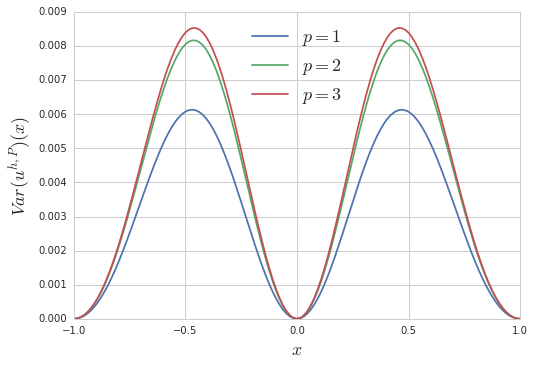

In [4]:
# ---------------- VARIANCE PLOTS ---------------

fig, ax = plt.subplots(1)

for p in range(1,4):

    basis = legendre_chaos(d, p)
    u = solve_system(N, d, p, 10e-1, mu, f)
    ax.plot(xs, calc_variance(basis, u), label=r'$p = %i$' % p)

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$Var(u^{h,P})(x)$', fontsize=18)
ax.legend(loc=0, fontsize=18)

fig.savefig('oned-stochastic-variance-plots.pdf')

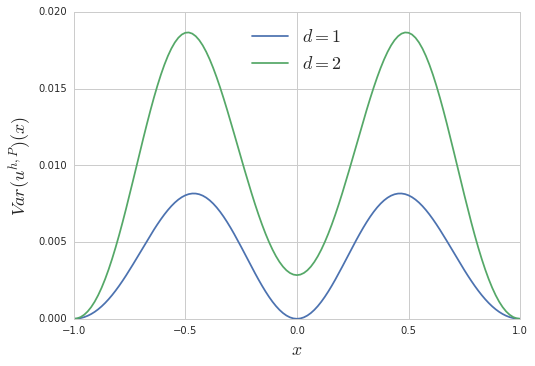

In [5]:
# ---------------- VARIANCE PLOTS ---------------

fig, ax = plt.subplots(1)

for d in range(1,3):

    basis = legendre_chaos(d, 2)
    u = solve_system(N, d, 2, 10e-1, mu, f)
    ax.plot(xs, calc_variance(basis, u), label=r'$d = %i$' % d)

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$Var(u^{h,P})(x)$', fontsize=18)
ax.legend(loc=0, fontsize=18)

fig.savefig('oned-stochastic-variance-plots-d.pdf')